In [1]:

import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
import xarray as xr
import rioxarray as rxr
import earthpy as et
import earthpy.plot as ep
import seaborn as sns

sns.set(font_scale=1.5, style="whitegrid")

os.chdir(os.path.join(et.io.HOME, "earth-analytics", "data"))

In [2]:
data_path = os.path.join("colorado-flood", "spatial", "outputs")
pre_chm_data_path = os.path.join(data_path, "pre-flood-chm.tif")
pre_lidar_chm = rxr.open_rasterio(pre_chm_data_path, masked=True).squeeze()
pre_lidar_chm

<xarray.DataArray (y: 2000, x: 4000)> Size: 32MB
[8000000 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 32kB 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 16kB 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [3]:
np.nanmin(pre_lidar_chm)

0.0

In [4]:
np.nanmax(pre_lidar_chm)

26.930054

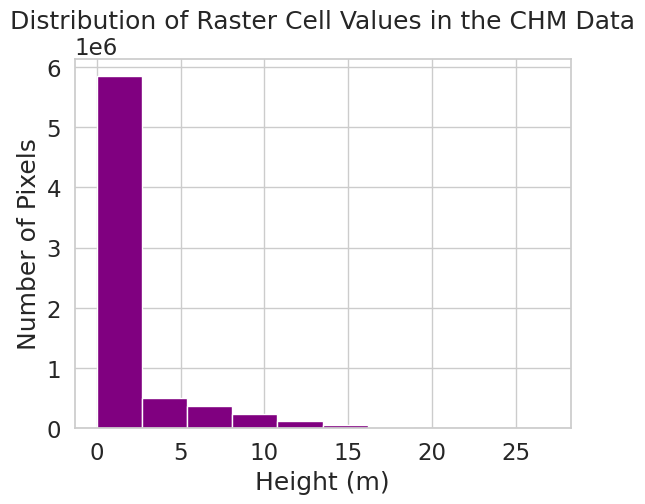

In [5]:
f, ax = plt.subplots()
pre_lidar_chm.plot.hist(color="purple")
ax.set(title="Distribution of Raster Cell Values in the CHM Data", xlabel="Height (m)", ylabel="Number of Pixels")
plt.show()

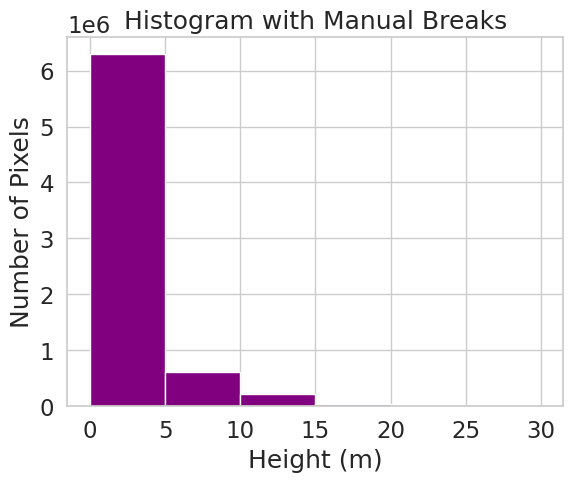

In [6]:
f, ax = plt.subplots()

pre_lidar_chm.plot.hist(color="purple", bins=[0,5, 10, 15, 20, 30])

ax.set(title="Histogram with Manual Breaks", xlabel="Height (m)", ylabel="Number of Pixels")

plt.show()

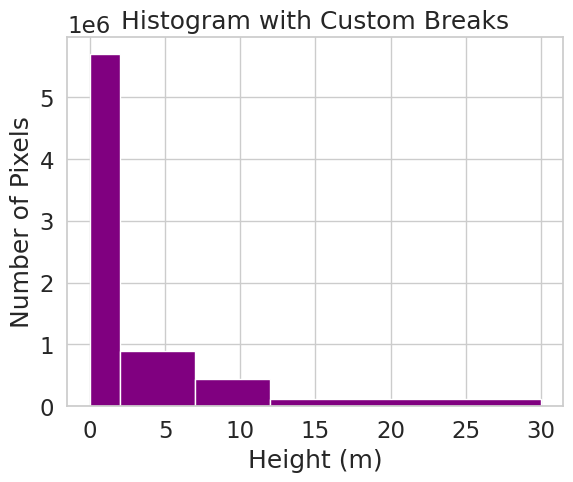

In [7]:
f, ax = plt.subplots()

pre_lidar_chm.plot.hist(color="purple", bins=[0,2,7,12,30])

ax.set(title="Histogram with Custom Breaks", xlabel="Height (m)", ylabel="Number of Pixels")

plt.show()

In [8]:
class_bins = [-np.inf, 2, 7, 12, np.inf]
class_bins

[-inf, 2, 7, 12, inf]

In [9]:
pre_lidar_chm_class = xr.apply_ufunc(np.digitize, pre_lidar_chm, class_bins)

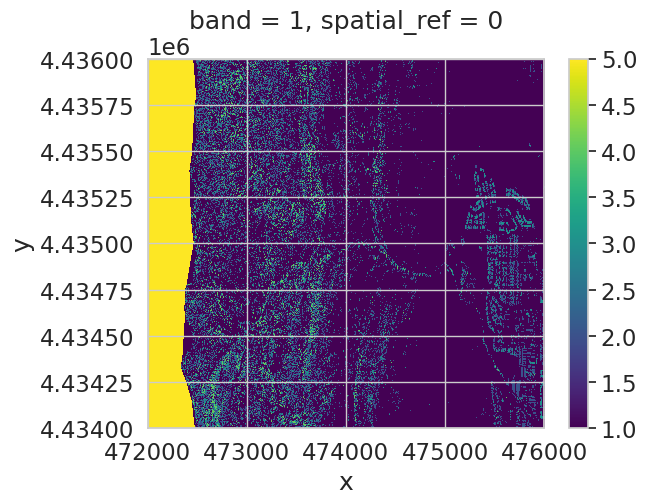

In [10]:
im = pre_lidar_chm_class.plot.imshow()
ax.set_axis_off()
plt.show()

In [11]:
pre_lidar_chm_class_ma = pre_lidar_chm_class.where(pre_lidar_chm_class !=5)
pre_lidar_chm_class_ma

<xarray.DataArray (y: 2000, x: 4000)> Size: 64MB
array([[nan, nan, nan, ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.],
       ...,
       [nan, nan, nan, ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.]])
Coordinates:
    band         int64 8B 1
  * x            (x) float64 32kB 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 16kB 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 8B 0

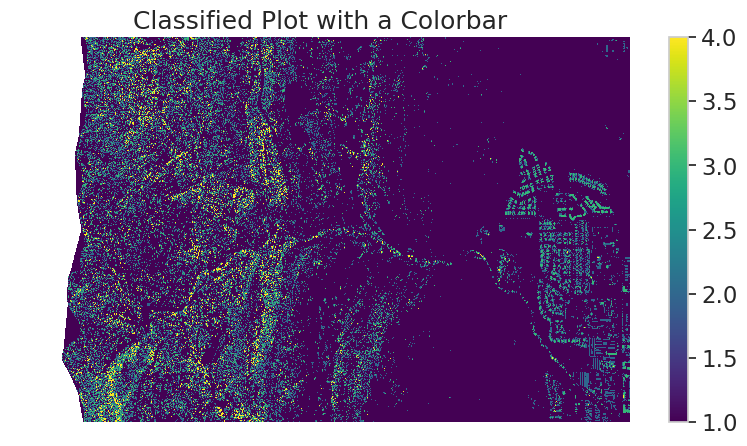

In [12]:
f, ax = plt.subplots(figsize=(10,5))

pre_lidar_chm_class_ma.plot.imshow()

ax.set(title="Classified Plot with a Colorbar")

ax.set_axis_off()

plt.show()

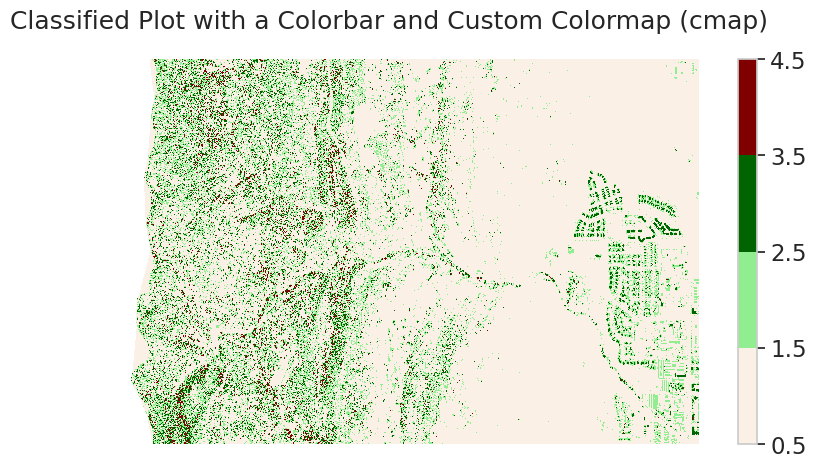

In [13]:
colors = ["linen", "lightgreen", "darkgreen", "maroon"]
class_bins = [0.5, 1.5, 2.5, 3.5, 4.5]
cmap = ListedColormap(colors)
norm = BoundaryNorm(class_bins, len(colors))

f, ax = plt.subplots(figsize=(10,5))

pre_lidar_chm_class_ma.plot.imshow(cmap=cmap, norm=norm)

ax.set(title="Classified Plot with a Colorbar and Custom Colormap (cmap)")

ax.set_axis_off()

plt.show()

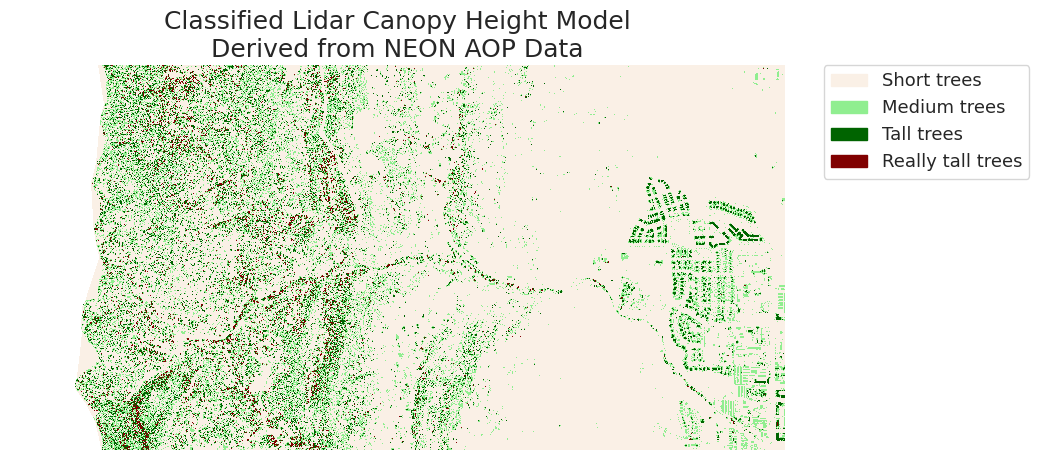

In [14]:
height_class_labels = ["Short trees", "Medium trees", "Tall trees", "Really tall trees"]
colors = ["linen", "lightgreen", "darkgreen", "maroon"]
cmap = ListedColormap(colors)
class_bins = [0.5, 1.5, 2.5, 3.5, 4.5]
norm = BoundaryNorm(class_bins, len(colors))

f, ax = plt.subplots(figsize=(10,5))

im = pre_lidar_chm_class_ma.plot.imshow(cmap=cmap, norm=norm, add_colorbar=False)

ep.draw_legend(im, titles=height_class_labels)
ax.set(title="Classified Lidar Canopy Height Model\nDerived from NEON AOP Data")
ax.set_axis_off()
plt.show()